In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


3.5.3 Visualizing High Dimensional Data
You may be starting to feel there's a bit of a problem here, or at least a challenge. You've constructed some potentially useful and business relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via principle components analysis (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

scale the data (important here because our features are heterogenous)
fit the PCA transformation (learn the transformation from the data)
apply the transformation to the data to create the derived features
(optionally) use the derived features to look for patterns in the data and explore the coefficients

In [2]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(101), int64(1), object(8)
memory usage: 606.0+ KB


In [103]:
df[df['player_name']=='Walker Zimmerman']

,fb_id,player_name,Squad_from_op,Opposing_Poss,Opposing_Touches,Player,Nation,Position,Tackle_pct_won,Nineties,...,pAdj_Fouls,pAdj_def_interceptions,pAdj_from_mish_tackles_won,pAdj_PK_conceded,pAdj_OG,pAdj_Recoveries,pAdj_Aerial_Duels_lost,lost_tackles,True_tackle_pct,pAdj_Tackle_int_blocks
376,220fa883,Walker Zimmerman,Nashville,53.5,633.441176,Walker Zimmerman\220fa883,us USA,DF,37.6,22.7,...,1.599542,3.477266,1.04318,0.0,0.0,12.448611,7.789075,0.834544,40.298507,6.537259


In [3]:
# scale data

              
dfs = df.loc[(df['Position']=='DF')
#              &(df['Aerial_win_pct']<100)&
#                (df['Aerial_win_pct']>0)
             &(df['Nineties']>15)&(df['True_tackle_pct']>5)] 

## if only some clubs  below

#(df['Squad_from_op'].isin(['LA Galaxy', 'Austin FC','Philadelphia', 'Los Angeles FC', 'San Jose', 'Sporting KC','NY Red Bulls', 'Vancouver', 'Toronto FC', 'Houston Dynamo']))&


dfs.reset_index()
# dfs = dfs.set_index('player_name')
names = dfs['player_name']
# dfs_index = dfs.index
dfs_columns = dfs.columns
dfs.head()

,fb_id,player_name,Squad_from_op,Opposing_Poss,Opposing_Touches,Player,Nation,Position,Tackle_pct_won,Nineties,...,pAdj_OG,pAdj_Recoveries,pAdj_Aerial_Duels_lost,lost_tackles,True_tackle_pct,pAdj_Tackle_int_blocks,avg_shrt+med_pass_pct,pct_long_balls,prog_carry+lng_comp+crosses,attacking_touches
1,acd47bc0,Julian Gressel,D.C. United,54.0,20526,Julian Gressel\acd47bc0,de GER,DF,28.3,29.9,...,0.0,13.905196,1.661976,1.495778,31.506849,7.589689,78.10,30.600462,17.959866,33.143813
8,ec80ba72,Brooks Lennon,Atlanta Utd,42.6,17449,Brooks Lennon\ec80ba72,us USA,DF,25.0,29.4,...,0.0,10.803106,1.723195,1.325535,40.517241,7.157886,90.45,18.038741,14.013605,27.108844
21,fdc715d9,Kai Wagner,Philadelphia,51.8,20563,Kai Wagner\fdc715d9,de GER,DF,35.1,31.5,...,0.0,15.957155,2.152116,1.679701,44.943820,9.973222,88.15,26.798379,18.507937,27.015873
24,db97d838,Daniel Lovitz,Nashville,53.5,21537,Daniel Lovitz\db97d838,us USA,DF,30.3,25.6,...,0.0,12.518428,1.788347,1.110008,38.532110,6.043379,82.25,26.657061,14.882812,21.757812
31,4501fd21,Žan Kolmanič,Austin FC,46.0,18825,Žan Kolmanič\4501fd21,si SVN,DF,30.6,23.4,...,0.0,10.728596,1.234946,1.234946,38.823529,6.946573,89.90,19.147345,13.846154,28.803419


In [4]:
def_stats = dfs[[ 'pAdj_Total_tackles', 'pAdj_Tackles_Won',
# 'pAdj_Tackles_Def_3rd','pAdj_Tackles_Mid_3rd', 'pAdj_Tackles_Att_3rd',
       'pAdj_Num_Dribblers_tackled', 'pAdj_Num_Dribbled_past',
       'pAdj_total_pressing', 'pAdj_Won_ball_5_sec',  'pAdj_Blocks',
       'pAdj_Interceptions', 'pAdj_Clearences',
#        'pAdj_Yellow_cards', 
       'pAdj_Fouls', 'pAdj_def_interceptions',
#         'pAdj_PK_conceded',
       'pAdj_Recoveries', 'pAdj_Aerial_Duels_lost',
       'True_tackle_pct', 'pAdj_Tackle_int_blocks']]


In [5]:
def_stats_scale = scale(def_stats)
def_scaled_df = pd.DataFrame(def_stats_scale, columns=def_stats.columns)
def_scaled_df.head()

,pAdj_Total_tackles,pAdj_Tackles_Won,pAdj_Tackles_Def_3rd,pAdj_Tackles_Mid_3rd,pAdj_Tackles_Att_3rd,pAdj_Num_Dribblers_tackled,pAdj_Num_Dribbled_past,pAdj_total_pressing,pAdj_Won_ball_5_sec,pAdj_Blocks,pAdj_Interceptions,pAdj_Clearences,pAdj_Yellow_cards,pAdj_Fouls,pAdj_def_interceptions,pAdj_PK_conceded,pAdj_Recoveries,pAdj_Aerial_Duels_lost,True_tackle_pct,pAdj_Tackle_int_blocks
0,-0.470631,-1.011397,-0.731579,-0.308011,0.740087,-0.322993,1.163617,0.485263,-0.023417,-0.185382,0.273351,-1.643945,2.112323,0.055759,0.273351,-0.640563,0.393562,-0.922734,-1.710728,-0.317430
1,-0.002619,-0.077920,-0.639522,1.006400,0.156484,0.182437,0.985915,1.216461,0.158048,-0.630326,-0.529059,-1.229554,2.319239,-0.887124,-0.529059,-0.640563,-0.879683,-0.886602,-0.009009,-0.531304
2,0.892899,0.846934,0.366573,1.172618,1.142616,0.993298,0.676303,0.222132,0.485783,0.934123,0.383828,-1.235917,0.453479,-0.303896,0.383828,-0.640563,1.235783,-0.633446,0.827002,0.863143
3,-0.436225,-0.469940,-1.233116,0.799921,0.362115,-0.462196,0.025503,0.350356,0.082849,-0.351015,-1.476235,-0.958227,0.538383,-0.324271,-1.476235,0.651111,-0.175634,-0.848148,-0.383925,-1.083324
4,-0.471693,-0.682608,-0.726120,0.342535,-0.737433,-0.162163,0.427215,-0.506680,-0.690537,-0.065151,-0.658757,-0.994522,1.372173,-1.027916,-0.658757,-0.640563,-0.910265,-1.174773,-0.328887,-0.635968


In [6]:

def_scaled_df.mean().head()

pAdj_Total_tackles     -8.171241e-17
pAdj_Tackles_Won        7.904788e-17
pAdj_Tackles_Def_3rd    4.467537e-16
pAdj_Tackles_Mid_3rd   -1.154632e-17
pAdj_Tackles_Att_3rd   -5.329071e-18
dtype: float64

In [7]:

def_scaled_df.std(ddof=0).head()


pAdj_Total_tackles      1.0
pAdj_Tackles_Won        1.0
pAdj_Tackles_Def_3rd    1.0
pAdj_Tackles_Mid_3rd    1.0
pAdj_Tackles_Att_3rd    1.0
dtype: float64

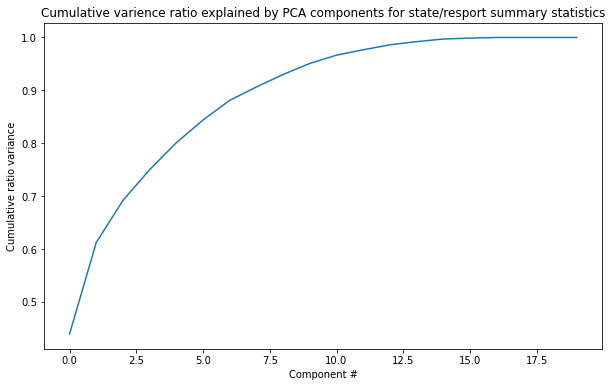

In [9]:
def_pca = PCA().fit(def_stats_scale)
plt.subplots(figsize=(10, 6))
plt.plot(def_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

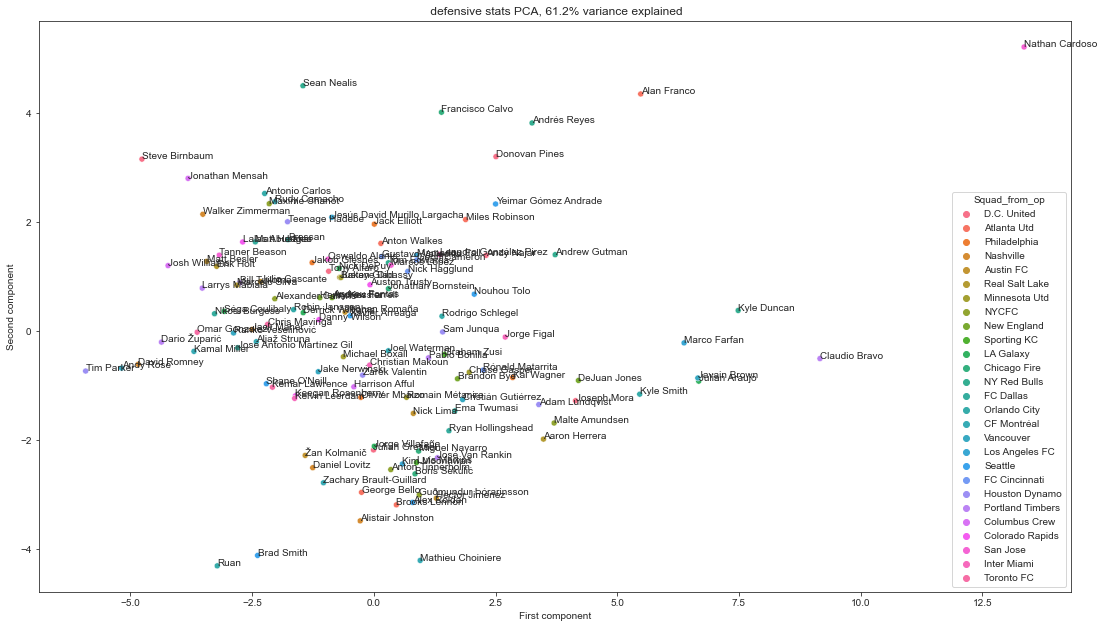

In [11]:

def_pca_x = def_pca.transform(def_stats_scale)
def_pca_df = pd.DataFrame(def_pca_x[:,:2])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = def_pca_x[:,0:2]
x = def_pca_x[:, 0]
y = def_pca_x[:, 1]
p = names
c = dfs['Squad_from_op']


pc_var = 100 * def_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=def_pca_df, x =x, y=y,hue=c, ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' defensive stats PCA, {pc_var:.1f}% variance explained')
for p, x, y in zip(p, x, y):
    plt.annotate(p, (x, y))
    

In [ ]:
defensivly walker is near antonio carlas rudy ... tanner beason

In [144]:
att_stats = dfs[['Nineties', 'xA',
       'Key_pass', 'Comp_prog', 
        'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past',
       'dribble_megs', 'carries', 'carries_prog_dist',
       'carries_prog', 'carries_att_3rd', 'carries_att_box',
       'miss_control', 'dispossed', 'recep_targ', 'recep_succ',
       'recept_pct', 'Fouls_drawn', 'Offsides', 'Crosses', 'PK_won',
       'Aerial_win_pct', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'xG', 'npxG',
       'npxG/Sh', 'np:G-xG']]

In [145]:
att_stats_scale = scale(att_stats)
att_scaled_df = pd.DataFrame(att_stats_scale, columns=att_stats.columns)
att_scaled_df.std(ddof=0).head(2)

,Nineties,xA,Key_pass,Comp_prog,Total_Prg_Dist,Short_Cmp,Short_Att,Short_Cmp_pct,Medium_Cmp,Medium_Att,...,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,npxG/Sh,np:G-xG
0,1.298069,5.517192,4.727238,1.770460,0.700152,-0.043568,0.368770,-3.339896,-0.943236,-0.503707,...,2.361860,-0.035633,1.882109,1.247218,-0.493131,-0.415216,2.573365,2.632043,-0.566411,-1.102316
1,1.201440,2.907719,3.434911,-0.612393,-1.069125,1.655974,1.549568,0.500913,-0.392602,-0.463566,...,-0.045552,1.219673,-0.986776,-0.336508,-0.852921,-0.795294,-0.340585,-0.311235,-0.018073,-0.928382
2,1.607280,1.113345,2.013398,2.448507,1.184776,0.502135,0.534397,-0.332751,0.483339,0.696784,...,0.849214,-0.201998,0.538535,0.125799,-0.084512,0.066550,-0.304384,-0.274669,-1.284665,1.752498
3,0.467064,2.122819,2.563297,1.707343,0.945272,-0.340774,-0.112456,-2.148947,-0.266750,0.126086,...,-0.647091,-0.640599,-0.401192,-0.677046,-0.852921,-0.795294,-0.606791,-0.580120,-0.767088,-0.738825
4,0.041898,1.668194,2.364672,0.637089,-0.334757,1.182880,1.166866,-0.005240,0.120089,0.114120,...,-0.570820,-0.292743,-0.509505,-0.527019,-0.852921,-0.795294,-1.015876,-0.993322,-0.893140,-0.447529


In [146]:
att_scaled_df.std(ddof=0).head()

Nineties          1.0
xA                1.0
Key_pass          1.0
Comp_prog         1.0
Total_Prg_Dist    1.0
dtype: float64

In [147]:
att_pca = PCA().fit(att_stats_scale)

In [148]:
att_pca = PCA().fit(att_stats_scale)
att_pca_x = att_pca.transform(att_stats_scale)

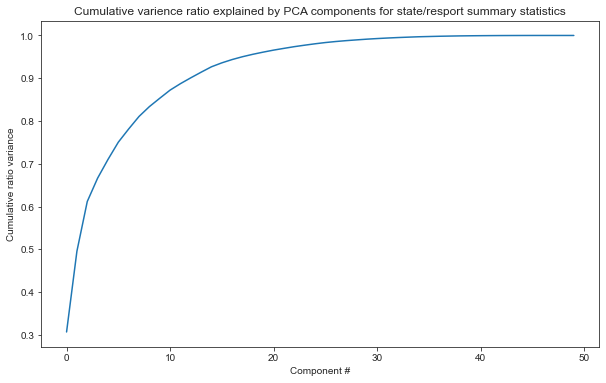

In [149]:

plt.subplots(figsize=(10, 6))
plt.plot(att_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

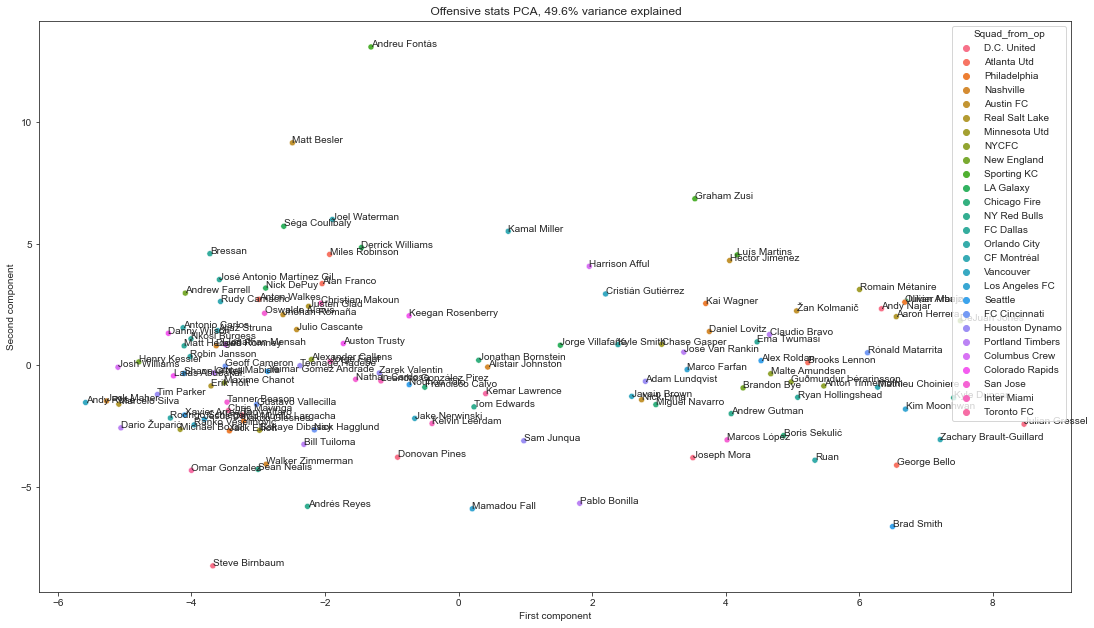

In [152]:
att_pca_df = pd.DataFrame(att_pca_x[:,:2])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = att_pca_x[:,0:2]
x = att_pca_x[:, 0]
y = att_pca_x[:, 1]
p = names
c = dfs['Squad_from_op']

pc_var = 100 * att_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=att_pca_df, x =x, y=y,hue=c, ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' Offensive stats PCA, {pc_var:.1f}% variance explained')
for p, x, y in zip(p, x, y):
    plt.annotate(p, (x, y))
    

In [ ]:
walker z is next to omar gonzalez and sean nealis and andres reyes and bill tuiloma 